In [1]:
import sys
import os
import numpy as np
from os.path import join
from pathlib import Path
from scipy.stats import pearsonr

root = Path(os.getcwd()).parent.parent
sys.path.append(str(root))

In [2]:
from matplotlib import font_manager, rc
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import argparse
import hashlib
import math
import h5py

## Results

In [3]:
args_path = join(root, 'dataset', 'lstm', 'feature_level_1', 'reason', 'bank', 'args.json')

args_df = pd.read_json(args_path, orient='index')
y_max = float(args_df.loc['y_max'].iloc[0])
y_max

154.0

In [4]:
result_path = join(root, 'results', 'lstm', 'feature_level_1', 'reason', 'bank', 'prediction.h5')

f = h5py.File(result_path, 'r')
pred = f.get('prediction').value
true = f.get('true').value
start_date = f.get('start_date').value
start_date = datetime(start_date[0], start_date[1], start_date[2])

<ipython-input-4-7326ce86cbdb>:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  pred = f.get('prediction').value
<ipython-input-4-7326ce86cbdb>:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  true = f.get('true').value
<ipython-input-4-7326ce86cbdb>:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  start_date = f.get('start_date').value


In [5]:
print(pred.shape, true.shape, start_date)

(20, 1, 1) (20, 1, 1) 2020-08-13 00:00:00


In [6]:
pred = pred.reshape((pred.shape[0]))
true = true.reshape((true.shape[0]))

pred = pred * y_max
true = true * y_max

## Value

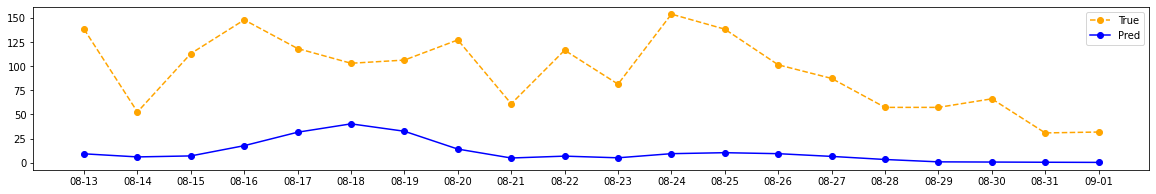

In [7]:
fig = plt.figure(figsize=(20,3))
ax = fig.add_subplot(1,1,1)

plt.plot(true,marker='o',ls='--',c='orange', label = 'True')
ax.plot(pred, 'bo-', label = 'Pred')
ax.legend()

dates = [(start_date + timedelta(days=i)).strftime('%m-%d') for i in range(len(true))]

# xfmt = mdates.DateFormatter('%m-%d')
# ax.xaxis.set_major_formatter(xfmt)
plt.xticks(np.arange(len(true)), dates)
plt.show()